##   Task 2 implement a simple TTS system
Refer this link : https://towardsdatascience.com/text-to-speech-with-tacotron-2-and-fastspeech-using-espnet-3a711131e0fa

---

**bold text**

In [ ]:
#Set the device(Runtime) into GPU
import torch
import torchaudio
torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
print(torch.__version__)
print(torchaudio.__version__)
print(device)

2.0.1+cu118
2.0.2+cu118
cpu


In [ ]:
#deep_phonemizer package
!pip3 install deep_phonemizer

In [ ]:
#import libraries
import IPython
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

In [ ]:
symbols = "abcdefghijklmnopqrstuvwxyz _-!'(),.:;? "
look_up = {j:v for v, j in enumerate(symbols)}
symbols = set(symbols)
print(symbols)

{'g', '?', 'i', 'o', 'p', 'x', 'h', ':', ',', 'u', ')', '.', 'v', "'", 'z', 't', 'k', 'f', '(', ';', 'd', 'r', '-', 'c', 'l', 'y', 'w', 'e', 'j', 'n', ' ', 'q', '_', 'a', 'm', '!', 's', 'b'}


In [ ]:
#Text and Conversion to Sequence
def text_to_seq(text):
    text = text.lower()
    return [look_up[t] for t in text if t in symbols]

In [ ]:
#
text = input('Pace your text here :')
print(text_to_seq(text))

Pace your text here :I Will Fly (Speech) Textual Questions and Answers Question 1. Why does Dr Kalam say that ‘No youth needs to fear about the future’? Answer: Dr Kalam says that ‘No youth needs to fear about the future’ because the ignited mind of the youth is the most powerful resource on the earth, under the earth and above the earth.  Question 2. What was the mission of Sashtrayaan? Answer: The mission of Sashtrayaan was the preparation of about 2000 students from different schools to be engineers, doctors, scientists, qualified managers and civil servants. This would, in turn, empower 2000 families of the village.  Question 3. Dr. Kalam’s talk was on the topic ‘Science Empowers the Nation’. How does science empower the nation? Answer: Science empowers the nation by making continuous progress in the fields of agriculture, medicine, nutrition, mining, industries of various kinds, architecture, space exploration, defense, transportation, communication and all such related matters th

In [ ]:
#Text Processing and Tacotron2 Inference
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()

with torch.inference_mode():
    processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[32, 11, 92,  ..., 67, 59,  7]])
tensor([2244], dtype=torch.int32)


In [ ]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['AY', ' ', 'W', 'AH', 'L', ' ', 'F', 'L', 'AY', ' ', '(', 'S', 'P', 'IY', 'CH', ')', ' ', 'T', 'EH', 'K', 'S', 'CH', 'UW', 'AH', 'L', ' ', 'K', 'W', 'EH', 'S', 'CH', 'AH', 'N', 'Z', ' ', 'AE', 'N', 'D', ' ', 'AE', 'N', 'S', 'ER', 'Z', ' ', 'K', 'W', 'EH', 'SH', 'AH', 'N', ' ', '.', ' ', 'HH', 'W', 'AY', ' ', 'D', 'AH', 'Z', ' ', 'D', 'AA', 'K', 'T', 'ER', ' ', 'K', 'AE', 'L', 'AH', 'M', ' ', 'S', 'EY', ' ', 'DH', 'AE', 'T', ' ', 'N', 'OW', ' ', 'Y', 'UW', 'TH', ' ', 'N', 'IY', 'D', 'Z', ' ', 'T', 'AH', ' ', 'F', 'IH', 'R', ' ', 'AH', 'B', 'AW', 'T', ' ', 'DH', 'AH', ' ', 'F', 'Y', 'UW', 'CH', 'ER', '?', ' ', 'AE', 'N', 'S', 'ER', ':', ' ', 'D', 'AA', 'K', 'T', 'ER', ' ', 'K', 'AE', 'L', 'AH', 'M', ' ', 'S', 'EH', 'Z', ' ', 'DH', 'AE', 'T', ' ', 'N', 'OW', ' ', 'Y', 'UW', 'TH', ' ', 'N', 'IY', 'D', 'Z', ' ', 'T', 'AH', ' ', 'F', 'IH', 'R', ' ', 'AH', 'B', 'AW', 'T', ' ', 'DH', 'AH', ' ', 'F', 'Y', 'UW', 'CH', 'ER', ' ', 'B', 'IH', 'K', 'AA', 'Z', ' ', 'DH', 'AH', ' ', 'IH', 'G', 'N', '

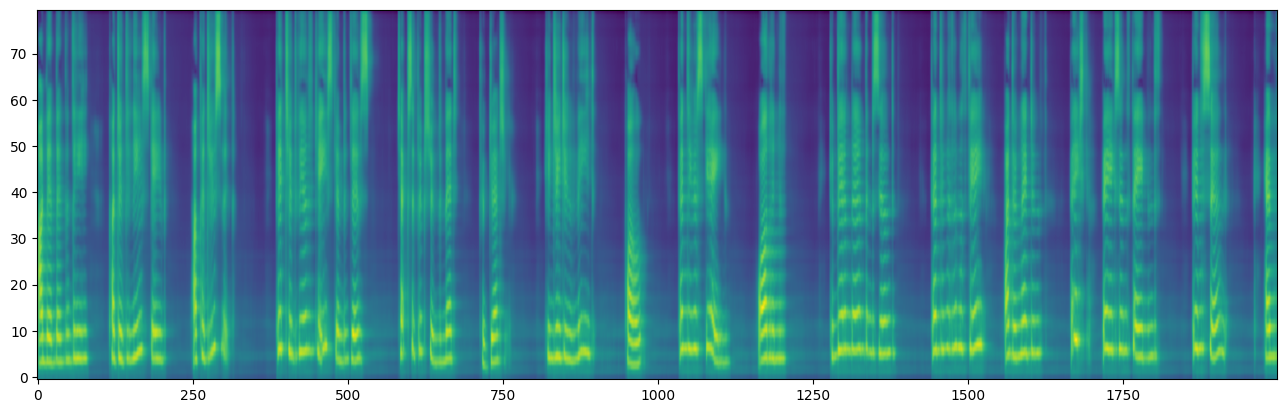

In [ ]:
#Displaying Spectrogram using Tacotron 2
tacotron2 = bundle.get_tacotron2().to(device)

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


_ = plt.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")

In [ ]:
#Spectrogram generated by Tacotron 2
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)
##Displaying Spectrogram
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
##Displaying Waveform
ax2.plot(waveforms[0].cpu().detach())
#display Audio
IPython.display.Audio(waveforms[0:1].cpu(), rate=vocoder.sample_rate)



In [ ]:
IPython.display.Audio(waveforms[0:1].cpu(), rate=vocoder.sample_rate)